In [ ]:
#John David Conley
#Machine Learning
#Assignment 3
#10-25-2022
#https://github.com/DavidConley/machinelearning03

In [11]:
#1. (Titanic Dataset)
##1. Find the correlation between ‘survived’ (target column) and ‘sex’ column for the Titanic use case in class.
###a. Do you think we should keep this feature?
##2. Do at least two visualizations to describe or show correlations.
##3. Implement Naïve Bayes method using scikit-learn library and report the accuracy.

#2. (Glass Dataset)
##1. Implement Naïve Bayes method using scikit-learn library.
###a. Use the glass dataset available in Link also provided in your assignment.
###b. Use train_test_split to create training and testing part.
##2. Evaluate the model on testing part using score and
##[classification_report(y_true, y_pred)]
##1. Implement linear SVM method using scikit library
###a. Use the glass dataset available in Link also provided in your assignment.
###b. Use train_test_split to create training and testing part.
##2. Evaluate the model on testing part using score and
##[classification_report(y_true, y_pred)]
#Do at least two visualizations to describe or show correlations in the Glass Dataset.
#Which algorithm you got better accuracy? Can you justify why?
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
#1: Titanic
titantrain = pd.read_csv('train.csv')
titantest = pd.read_csv('test.csv')
titantrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titantest

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [89]:
combine = [titantrain, titantest]
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name  Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    0  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
 2                               Heikkinen, Miss. Laina    1  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
 4                             Allen, Mr. William Henry    0  35.0      0   
 ..                                                 ...  ...   ...  

In [7]:
##1
print(titantrain[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [8]:
###a
print("Yes, both are as valid a statistic as the others.")

Yes, both are as valid a statistic as the others.


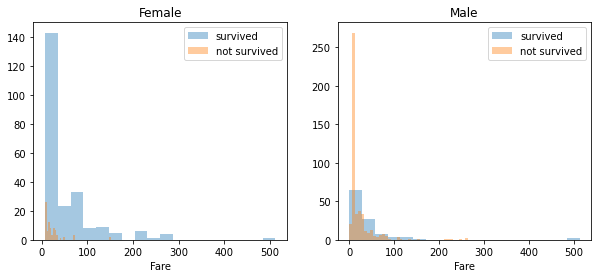

In [15]:
##2
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titantrain[titantrain['Sex']=='female']
men = titantrain[titantrain['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Fare.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Fare.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Fare.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Fare.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

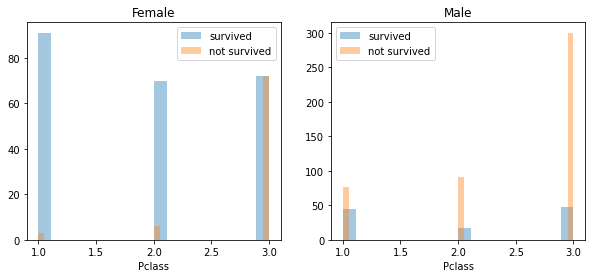

In [18]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titantrain[titantrain['Sex']=='female']
men = titantrain[titantrain['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Pclass.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Pclass.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Pclass.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Pclass.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [87]:
##3
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
titantrain2 = pd.read_csv('train_preprocessed.csv')
titantest2 = pd.read_csv('test_preprocessed.csv')

In [92]:
X_train = titantrain2.drop(["Survived"], axis=1)
Y_train = titantrain2["Survived"]
X_test = titantest2.drop(["Sex"], axis=1)
Y_test = titantest2["Sex"]

classifier = GaussianNB()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print('accuracy is',accuracy_score(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       266
           1       0.36      1.00      0.53       152

    accuracy                           0.36       418
   macro avg       0.18      0.50      0.27       418
weighted avg       0.13      0.36      0.19       418

[[  0 266]
 [  0 152]]
accuracy is 0.36363636363636365


In [90]:
#2: Glass
glass = pd.read_csv('glass.csv')
iris = pd.read_csv('Iris.csv')

glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [91]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [100]:
from sklearn.model_selection import train_test_split
glasX = glass.iloc[:, :-1].values
glasY = glass.iloc[:, -1].values
glasX_train, glasX_test, glasY_train, glasY_test = train_test_split(glasX, glasY, test_size = 0.2, random_state = 0)

In [101]:
##Naïve Bayes
##1
glasclassifier = GaussianNB()
glasclassifier.fit(glasX_train, glasY_train)

glasY_pred = glasclassifier.predict(glasX_test)

##2
print(classification_report(glasY_test, glasY_pred))
print(confusion_matrix(glasY_test, glasY_pred))
print('accuracy is',accuracy_score(glasY_pred,glasY_test))

              precision    recall  f1-score   support

           1       0.19      0.44      0.27         9
           2       0.33      0.16      0.21        19
           3       0.33      0.20      0.25         5
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.37        43
   macro avg       0.42      0.47      0.42        43
weighted avg       0.40      0.37      0.36        43

[[ 4  3  1  0  1  0]
 [14  3  1  1  0  0]
 [ 3  1  1  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
accuracy is 0.37209302325581395


In [102]:
##Linear SVM
##1
glasclassifier = SVC()
glasclassifier.fit(glasX_train, glasY_train)

glasY_pred = glasclassifier.predict(glasX_test)

##2
print(classification_report(glasY_test, glasY_pred))
print(confusion_matrix(glasY_test, glasY_pred))
print('accuracy is',accuracy_score(glasY_pred,glasY_test))

              precision    recall  f1-score   support

           1       0.21      1.00      0.35         9
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6

    accuracy                           0.21        43
   macro avg       0.03      0.17      0.06        43
weighted avg       0.04      0.21      0.07        43

[[ 9  0  0  0  0  0]
 [19  0  0  0  0  0]
 [ 5  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 6  0  0  0  0  0]]
accuracy is 0.20930232558139536


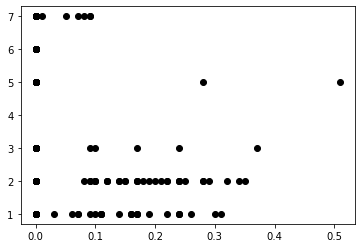

In [118]:
#Visualizations
Fe = glass.Fe
Type = glass.Type
plt.plot(Fe, Type, 'o', color='black')

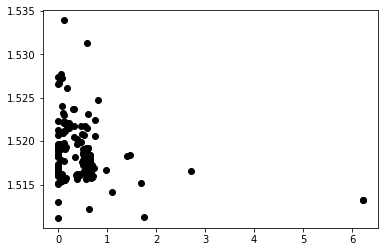

In [124]:
K = glass.K
RI = glass.RI
plt.plot(K, RI, 'o', color='black')

In [125]:
#Final
print("Bayes. It has the best prediction results and actual precision being calculated on a majority of items.")

Bayes. It has the best prediction results and actual precision being calculated on a majority of items.
